<a href="https://colab.research.google.com/github/i-laya/storytelling-with-data/blob/patch-1/College_Sports_%26_Admissions_Story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

This demonstration notebook provides a suggested set of libraries that you might find useful in crafting your data stories.  You should comment out or delete libraries that you don't use in your analysis.

In [7]:
!pip install git+https://github.com/ContextLab/davos.git
import davos #this provides the "smuggle" keyword-- used as a more robust version of "import"

  Cloning https://github.com/ContextLab/davos.git to /tmp/pip-req-build-gd_airpb
  Running command git clone -q https://github.com/ContextLab/davos.git /tmp/pip-req-build-gd_airpb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for davos: filename=davos-0.0.1-cp37-none-any.whl size=37733 sha256=2c5c4b08d4abd156c0610da8c0d670f67d53ae38834c084fac4b5c5fcf7cd5f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-_h40ltre/wheels/62/30/bc/79958ce75e105bdcf95c737091e62372429850960d6628e277
Successfully built davos


In [8]:
#number crunching
smuggle numpy as np
smuggle pandas as pd


#data import
from pydrive.auth smuggle GoogleAuth
from pydrive.drive smuggle GoogleDrive
from google.colab smuggle auth
from oauth2client.client smuggle GoogleCredentials
smuggle pandas_datareader as pdr

#web scraping
#from twitterscraper smuggle query_tweets
#from twitterscraper.query smuggle query_tweets_once as query_tweets_advanced
#from yahoo_finance smuggle Share

#data visualization
smuggle plotly # pip: plotly==4.14.3
smuggle plotly.express as px
#smuggle seaborn as sns
#smuggle bokeh as bk
from matplotlib smuggle pyplot as plt
smuggle plotnine as pn
smuggle hypertools as hyp
smuggle folium as fm
from mpl_toolkits.mplot3d smuggle Axes3D

#machine learning and stats
#smuggle scipy as sp
#smuggle sklearn as sk
#smuggle tensorflow as tf
#smuggle statsmodels.api as sm

#text analysis
#smuggle nltk
#smuggle textblob as tb
#from flair.embeddings smuggle WordEmbeddings, CharacterEmbeddings, StackedEmbeddings, FlairEmbeddings, BertEmbeddings, ELMoEmbeddings, DocumentPoolEmbeddings
#from flair.data smuggle Sentence
#nltk.download('brown')
#nltk.download('punkt')

     |████████████████████████████████| 13.2MB 22.0MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 1.2MB 19.7MB/s 
  Created wheel for hypertools: filename=hypertools-0.6.3-cp37-none-any.whl size=46636 sha256=84429d623a7b1e9df4080ea9e8da3504257a3c2a932009dbfeed1df85d035ec0
  Stored in directory: /root/.cache/pip/wheels/81/db/79/f73ff50f0be0535fef93120d7fe39cc0d329e63234963066a4
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=b3354a0f7aec311ec67f042eaead61f8e6d12151f0405d26de2f7c9805e4d562
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=d82cfd4f332c1b17dae5eaa400823490ccdb33bbde8a55a8ea7fa3535149c7ae
  Stored in directory

/usr/local/lib/python3.7/dist-packages/hypertools/plot/__init__.py:10: UserWarning:

Could not switch backend to TkAgg.  This may impact performance of the plotting functions.



# Google authentication

Run the next cell to enable use of your Google credentials in uploading and downloading data via Google Drive.  See tutorial [here](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=P3KX0Sm0E2sF) for interacting with data via Google services.

In [9]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Project team

Laya Indukuri was the sole contributor to the project.

# Background and overview

I sought to understand whether sports can play a role in college admissions, and if so, for which groups and whether or not it is "fair". My inspiration came from the recent [Operation Varsity Blues Scandal](https://www.nytimes.com/2019/03/12/us/college-admissions-cheating-scandal.html) from 2019.

# Approach

The approach I plan to take in order to explore this question is 1) do preliminary research to understand the college admissions process 2) do research to understand the role sports play in colleges and the college admissions process 3) understand which groups may or may not benefit from this and 4) explore whether or not this is equitable and if it should be changed.

# Quick summary

I found that athletics admissions do have a higher acceptance rate for the same colleges, but this primarily benefits wealthy and white individuals. 



# Data

Briefly describe your dataset(s), including links to original sources.  Provide any relevant background information specific to your data sources.

1. [College NCAA Finances](https://docs.google.com/spreadsheets/d/1udOE-ny63N97_wPaa5K4t_un52dwO-D0Ob7-z8S8X4A/edit#gid=0)
2. [# of College Athletics Scholarship Programs](https://docs.google.com/spreadsheets/d/1AqXbql-2GoYXYiOWjUju67stG11xdXbd6hy2C4uoc4k/edit#gid=0)
3. [NCAA Demographics Database Spreadsheet](https://docs.google.com/spreadsheets/d/1TaGwo1LjyaQE_dDxqZ-h721usFo05WDNQDmYrfE5Swo/edit#gid=542084305)
4. [Estimated Probability of High School Athletes competing in College Athletics](https://docs.google.com/spreadsheets/d/1rUs8tGOwtVgA8k5oSCY2vm1JTN47nwcH1HT2a6d3kus/edit#gid=0)

# Analysis

Briefly describe each step of your analysis, followed by the code implementing that part of the analysis and/or producing the relevant figures.  (Copy this text block and the following code block as many times as are needed.)

In [10]:
# Provide code for downloading or importing your data here
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

#sh = gc.create('My cool spreadsheet')

CollegeNCAAFinancesWorksheet = gc.open('College NCAA Finances').sheet1

# get_all_values gives a list of rows.
CollegeNCAAFinancesWorksheetRows = CollegeNCAAFinancesWorksheet.get_all_values()
print(CollegeNCAAFinancesWorksheetRows)

import pandas as pd
df = pd.DataFrame.from_records(CollegeNCAAFinancesWorksheetRows)
df.columns = df.iloc[0]
df = df[1:]

[['Rank', 'School', 'Conference', 'Total Revenue', 'Total Expenses', 'Total Allocated', '% Allocated'], ['1', 'Texas', 'Big 12', '$223,879,781', '$204,234,897', '$0', '0'], ['2', 'Texas A&M', 'SEC', '$212,748,002', '$169,012,456', '$0', '0'], ['3', 'Ohio State', 'Big Ten', '$210,548,239', '$220,572,956', '$0', '0'], ['4', 'Michigan', 'Big Ten', '$197,820,410', '$190,952,175', '$261,773', '0.13'], ['5', 'Georgia', 'SEC', '$174,042,482', '$143,299,554', '$3,508,850', '2.02'], ['6', 'Penn State', 'Big Ten', '$164,529,326', '$160,369,805', '$0', '0'], ['7', 'Alabama', 'SEC', '$164,090,889', '$185,317,681', '$2,654,551', '1.62'], ['8', 'Oklahoma', 'Big 12', '$163,126,695', '$157,958,270', '$0', '0'], ['9', 'Florida', 'SEC', '$159,706,937', '$141,829,002', '$2,261,773', '1.42'], ['10', 'LSU', 'SEC', '$157,787,782', '$148,977,880', '$0', '0'], ['11', 'Wisconsin', 'Big Ten', '$157,660,107', '$154,621,828', '$3,029,000', '1.92'], ['12', 'Florida State', 'ACC', '$152,757,883', '$150,147,316', '$

In [ ]:
df[df.columns[3]] = df[df.columns[3]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
fig = px.bar(df[:10], x="Total Revenue", y="School", orientation='h', title='School Revenue in Dollars')
fig.show()

In [ ]:
CollegeSportScholarshipProgramsWorksheet = gc.open('College Sport Scholarship Programs').sheet1

# get_all_values gives a list of rows.
CollegeSportScholarshipProgramsWorksheetRows = CollegeSportScholarshipProgramsWorksheet.get_all_values()
print(CollegeSportScholarshipProgramsWorksheetRows)

import pandas as pd
df = pd.DataFrame.from_records(CollegeSportScholarshipProgramsWorksheetRows)
df.columns = df.iloc[0]
df = df[1:]

# Drop cycling since its value is n/a
df = df.drop(6)
# Convert column to numeric
df['# Colleges Offering Scholarship'] = df['# Colleges Offering Scholarship'].apply(pd.to_numeric)

[['Sport', '# Colleges Offering Scholarship'], ['Volleyball', '1800'], ['Skiing', '41'], ['Rowing', '150'], ['Gymnastics', '80'], ['Bowling', '140'], ['Cycling', 'n/a'], ['Fencing', '45'], ['Field Hockey', '280'], ['Lacrosse', '600'], ['Rifle', '30'], ['Rugby', '30'], ['Softball', '1700'], ['Water Polo', '115'], ['Wrestling', '370'], ['Soccer', '1700'], ['Golf', '1300'], ['Track & Field', '1200'], ['Swimming', '660'], ['Tennis', '1200'], ['Hockey', '170'], ['Basketball', '2000'], ['Football', '900']]


In [ ]:
fig = px.bar(df.sort_values(by='# Colleges Offering Scholarship', ascending=False), y="# Colleges Offering Scholarship", x="Sport", title='Sport Scholarships Offered by Universities')
fig.show()

In [ ]:
NCAADemographicsDatabaseSpreadsheetWorksheet = gc.open('NCAA Demographics Database Spreadsheet').get_worksheet(3)

# get_all_values gives a list of rows.
NCAADemographicsDatabaseSpreadsheetWorksheetRows = NCAADemographicsDatabaseSpreadsheetWorksheet.get_all_values()
print(NCAADemographicsDatabaseSpreadsheetWorksheetRows)

import pandas as pd
df = pd.DataFrame.from_records(NCAADemographicsDatabaseSpreadsheetWorksheetRows)
df.columns = df.iloc[0]
df = df[160:166]
df = df.drop(columns=['Division_Subdivision', 'Title/Position'])
# Remove commas and convert to numeric
df[['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']] = df[['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
df = df.set_index('Gender-Race/Ethnicity')

[['Division_Subdivision', 'Title/Position', 'Gender-Race/Ethnicity', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], ['DI FBS Autonomy Five Conferences', 'Chancellor & President', 'Female, Other', '', '', '', '', '', '2', '3', '3', '2'], ['', '', 'Female, White', '', '', '', '', '', '7', '8', '5', '8'], ['', '', 'Male, Black', '', '', '', '', '', '1', '2', '2', '2'], ['', '', 'Male, Other', '', '', '', '', '', '9', '9', '7', '7'], ['', '', 'Male, White', '', '', '', '', '', '60', '51', '60', '53'], ['', 'Director of Athletics', 'Female, Black', '', '', '', '', '', '1', '1', '1', '2'], ['', '', 'Female, White', '4', '4', '3', '4', '6', '5', '5', '4', '2'], ['', '', 'Male, Black', '5', '5', '8', '9', '9', '10', '10', '9', '6'], ['', '', 'Male, Other', '2', '2', '2', '2', '4', '3', '6', '6', '5'], ['', '', 'Male, White', '49', '49', '51', '52', '47', '47', '43', '44', '48'], ['', 'Associate/Assistant AD', 'Female, Black', '25', '24', '24', '31', '29', '40', '49', 

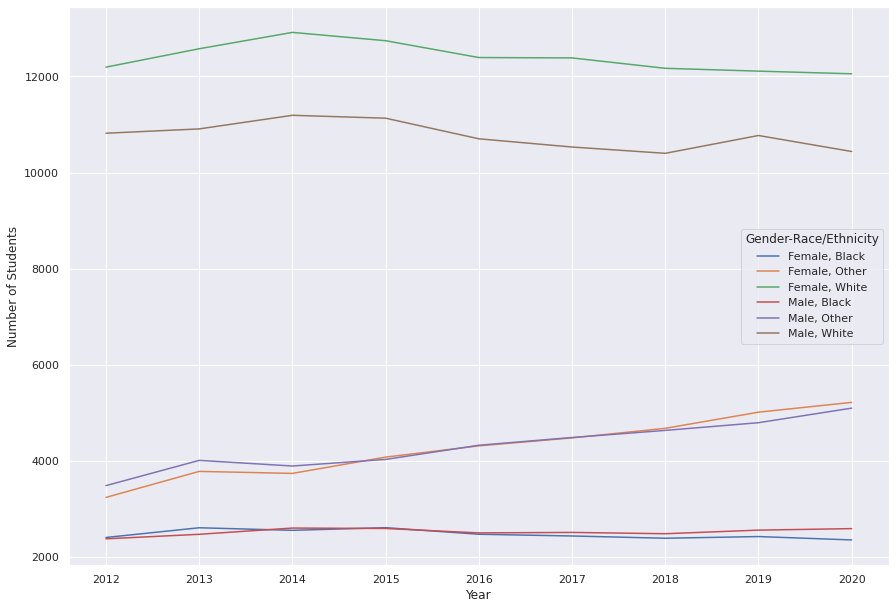

In [ ]:
sns.set(rc={'figure.figsize':(14.7,10.27)})
ax = df.T.plot.line()
ax.set(xlabel="Year", ylabel="Number of Students")
ax

In [16]:
WomenHStoNCAAWorksheet = gc.open('estimated probability of competing in college athletics').get_worksheet(1)

# get_all_values gives a list of rows.
WomenHStoNCAAWorksheetRows = WomenHStoNCAAWorksheet.get_all_values()
print(WomenHStoNCAAWorksheetRows)

df_women = pd.DataFrame.from_records(WomenHStoNCAAWorksheetRows)
df_women.columns = df_women.iloc[0]
df_women = df_women[1:]
#df_women = df_women.set_index('')

MenHStoNCAAWorksheet = gc.open('estimated probability of competing in college athletics').get_worksheet(2)

# get_all_values gives a list of rows.
MenHStoNCAAWorksheetRows = MenHStoNCAAWorksheet.get_all_values()
print(MenHStoNCAAWorksheetRows)

df_men = pd.DataFrame.from_records(MenHStoNCAAWorksheetRows)
df_men.columns = df_men.iloc[0]
df_men = df_men[1:]
#df_men = df_men.set_index('')

[['Sport', 'High School Participants', 'NCAA Participants', 'Overall % HS to NCAA', '% HS to NCAA Division I', '% HS to NCAA Division II', '% HS to NCAA Division III'], ['Basketball', '399,067', '16,509', '4.10%', '1.30%', '1.20%', '1.70%'], ['Cross Country', '219,345', '15,624', '7.10%', '2.70%', '1.70%', '2.70%'], ['Field Hockey', '60,824', '6,119', '10.10%', '2.90%', '1.40%', '5.80%'], ['Golf', '79,821', '5,436', '6.80%', '2.80%', '1.90%', '2.10%'], ['Ice Hockey', '9,650', '2,531', '26.20%', '8.90%', '1.10%', '16.20%'], ['Lacrosse', '99,750', '12,452', '12.50%', '3.70%', '2.60%', '6.20%'], ['Soccer', '394,105', '28,310', '7.20%', '2.40%', '1.90%', '2.90%'], ['Softball', '362,038', '20,419', '5.60%', '1.80%', '1.70%', '2.20%'], ['Swimming', '173,088', '12,980', '7.50%', '3.30%', '1.20%', '3.00%'], ['Tennis', '189,436', '8,596', '4.50%', '1.50%', '1.00%', '2.00%'], ['Track & Field', '488,267', '30,326', '6.20%', '2.80%', '1.50%', '1.90%'], ['Volleyball', '452,808', '17,780', '3.90%', 

In [17]:
df_women

,Sport,High School Participants,NCAA Participants,Overall % HS to NCAA,% HS to NCAA Division I,% HS to NCAA Division II,% HS to NCAA Division III
1,Basketball,"399,067","16,509",4.10%,1.30%,1.20%,1.70%
2,Cross Country,"219,345","15,624",7.10%,2.70%,1.70%,2.70%
3,Field Hockey,"60,824","6,119",10.10%,2.90%,1.40%,5.80%
4,Golf,"79,821","5,436",6.80%,2.80%,1.90%,2.10%
5,Ice Hockey,"9,650","2,531",26.20%,8.90%,1.10%,16.20%
6,Lacrosse,"99,750","12,452",12.50%,3.70%,2.60%,6.20%
7,Soccer,"394,105","28,310",7.20%,2.40%,1.90%,2.90%
8,Softball,"362,038","20,419",5.60%,1.80%,1.70%,2.20%
9,Swimming,"173,088","12,980",7.50%,3.30%,1.20%,3.00%
10,Tennis,"189,436","8,596",4.50%,1.50%,1.00%,2.00%


In [54]:
#data_canada = px.data.gapminder().query("country == 'Canada'")
import plotly.express as px

df_women[df_women.columns[3]] = df_women[df_women.columns[3]].replace('[\%,]', '', regex=True).astype(float)

fig = px.bar(df_women.sort_values(by='Sport', ascending=True), y='Overall % HS to NCAA', x='Sport', title='% of High School Athletes competing in NCAA')

fig.show()



# Interpretations and conclusions

I found that athletics related college admissions do have a higher rate of admission, but this primarily benefits wealthy white individuals. Further exploration can uncover the exact changes in admission rates and potential ways to benefit all qualified student-athletes equally, regardless of their SES.

# Future directions

A starting point for future directions could be identifying which colleges in particular are more "unfair" than others in order to understand why that is and how we can fix it.